In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import jax.numpy as jnp
import numpy as np
import numpyro
from reusable.util import load_args
from plotting.paper import get_trained_draws_from_args, get_training_histories_from_args, plot_training_histories, plot_trained_draws
from plotting.helpers import pretty_prior
from plotting.scores import display_loss_scores, get_loss_scores_from_args, merge_dicts

In [44]:
code = 27
name = 2
disambig = 1
# nb 27-2-11 is just 27-1-1 with some loss functions filtered out

num_rows = 18
num_cols = 4 # including GP

args = load_args(code, disambig, name)

hists = []

titles = []

for index in range(len(args["length_priors"]) * len(args["variance_priors"]) * len(args["gp_kernels"])):

    length_index, variance_index, gp_kernel_index = jnp.unravel_index(
        index, (len(args["length_priors"]), len(args["variance_priors"]), len(args["gp_kernels"]))
    )

    args.update(args["length_priors"][length_index])

    args.update(args["variance_priors"][variance_index])

    args["gp_kernel"] = args["gp_kernels"][gp_kernel_index]

    titles.append(
        "$\ell$: "
        + pretty_prior(args["length_prior_choice"], args["length_prior_arguments"])
        + ",\n $v$: "
        + pretty_prior(args["variance_prior_choice"], args["variance_prior_arguments"])
        + ",\n  "
        + ("RBF kernel" if args["gp_kernel"].__name__ == "esq_kernel" else "RQ kernel with $\\alpha=0.5$")
    )

  

    hists = hists + get_training_histories_from_args(args, "B")[0]


In [45]:
titles

['$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $\\mathrm{Gamma}(5, 0.25)$,\n  RBF kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $\\mathrm{Gamma}(5, 0.25)$,\n  RQ kernel with $\\alpha=0.5$',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $|\\mathcal{N}(0, 1)|$,\n  RBF kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $|\\mathcal{N}(0, 1)|$,\n  RQ kernel with $\\alpha=0.5$',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $\\mathcal{U}(2, 12)$,\n  RBF kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$,\n $v$: $\\mathcal{U}(2, 12)$,\n  RQ kernel with $\\alpha=0.5$',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$,\n $v$: $\\mathrm{Gamma}(5, 0.25)$,\n  RBF kernel',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$,\n $v$: $\\mathrm{Gamma}(5, 0.25)$,\n  RQ kernel with $\\alpha=0.5$',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$,\n $v$: $|\\mathcal{N}(0, 1)|$,\n  RBF kernel',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$,\n $v$: $|\\mathcal{N}(0, 1)|$,\n  RQ kernel with $\\alpha=0.5$',
 '$\\ell$: $\\lo

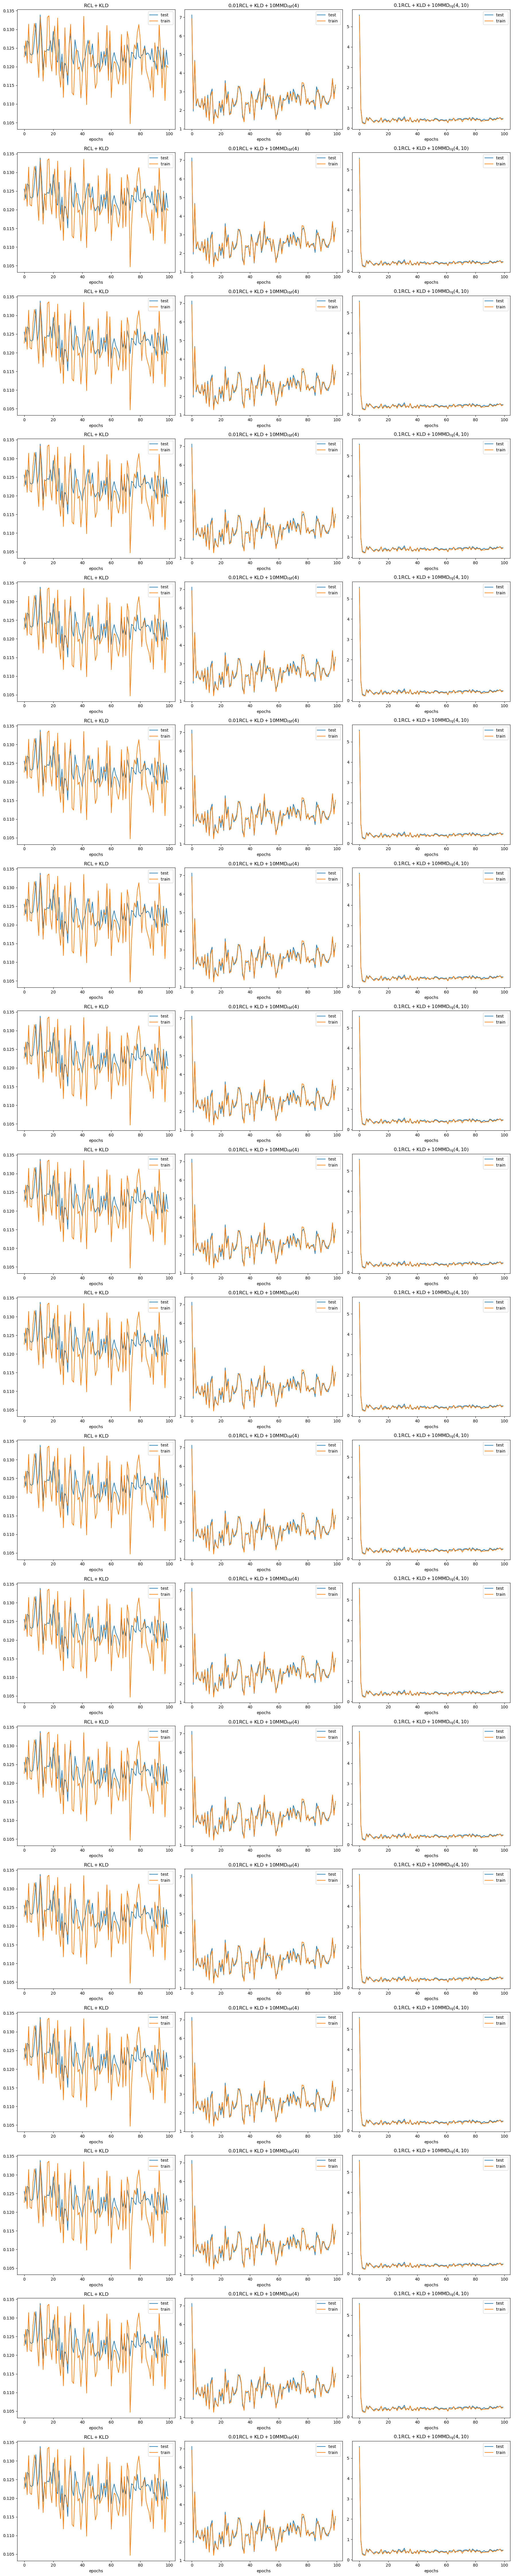

In [19]:
plot_training_histories(hists, f"{code}/{code}_{name}_{disambig}", num_rows, num_cols-1)

In [47]:

draws = []

for index in range(len(args["length_priors"]) * len(args["variance_priors"]) * len(args["gp_kernels"])):



    length_index, variance_index, gp_kernel_index = jnp.unravel_index(
        index, (len(args["length_priors"]), len(args["variance_priors"]), len(args["gp_kernels"]))
    )


    args.update(args["length_priors"][length_index])

    args.update(args["variance_priors"][variance_index])

    args["gp_kernel"] = args["gp_kernels"][gp_kernel_index]
    print(index, length_index, variance_index, gp_kernel_index)
    # change to "B" if running old ones!
    new = get_trained_draws_from_args( args, "C", include_gp=True)[0]
    #new[0] = (new[0][0],  new[0][1] + " " + titles[index])

    draws = draws + new


0 0 0 0
Mean 20.0 Variance 80.0
1 0 0 1
Mean 20.0 Variance 80.0
2 0 1 0
Mean 0.7978845 Variance 0.3633802276324186
3 0 1 1
Mean 0.7978845 Variance 0.3633802276324186
4 0 2 0
Mean 7.0 Variance 8.333333333333334
5 0 2 1
Mean 7.0 Variance 8.333333333333334
6 1 0 0
Mean 20.0 Variance 80.0
7 1 0 1
Mean 20.0 Variance 80.0
8 1 1 0
Mean 0.7978845 Variance 0.3633802276324186
9 1 1 1
Mean 0.7978845 Variance 0.3633802276324186
10 1 2 0
Mean 7.0 Variance 8.333333333333334
11 1 2 1
Mean 7.0 Variance 8.333333333333334
12 2 0 0
Mean 20.0 Variance 80.0
13 2 0 1
Mean 20.0 Variance 80.0
14 2 1 0
Mean 0.7978845 Variance 0.3633802276324186
15 2 1 1
Mean 0.7978845 Variance 0.3633802276324186
16 2 2 0
Mean 7.0 Variance 8.333333333333334
17 2 2 1
Mean 7.0 Variance 8.333333333333334


In [48]:
bounds = jnp.array([jnp.mean(numpyro.diagnostics.hpdi(x[0]), axis=1) * jnp.array([1.2,1.2]) for x in draws[::num_cols]])

18 18 7
WARNING! all draws were NaN for title $\mathrm{RCL}+\mathrm{KLD}$, ylabel 
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(4)$, ylabel 
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(4)$, ylabel 
WARNING! all draws were NaN for title $\mathrm{RCL}+\mathrm{KLD}$, ylabel 
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(4)$, ylabel 
WARNING! all draws were NaN for title $\mathrm{RCL}+\mathrm{KLD}$, ylabel 


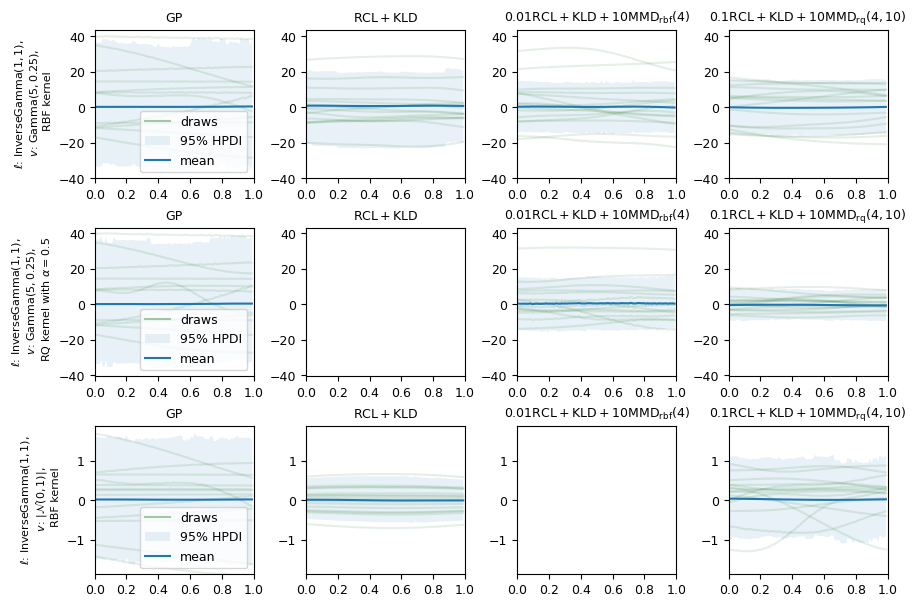

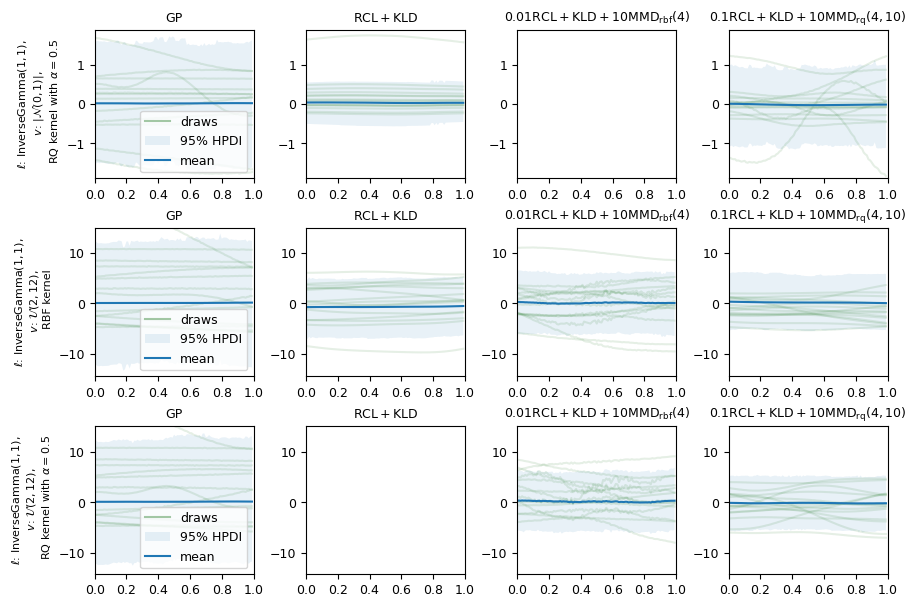

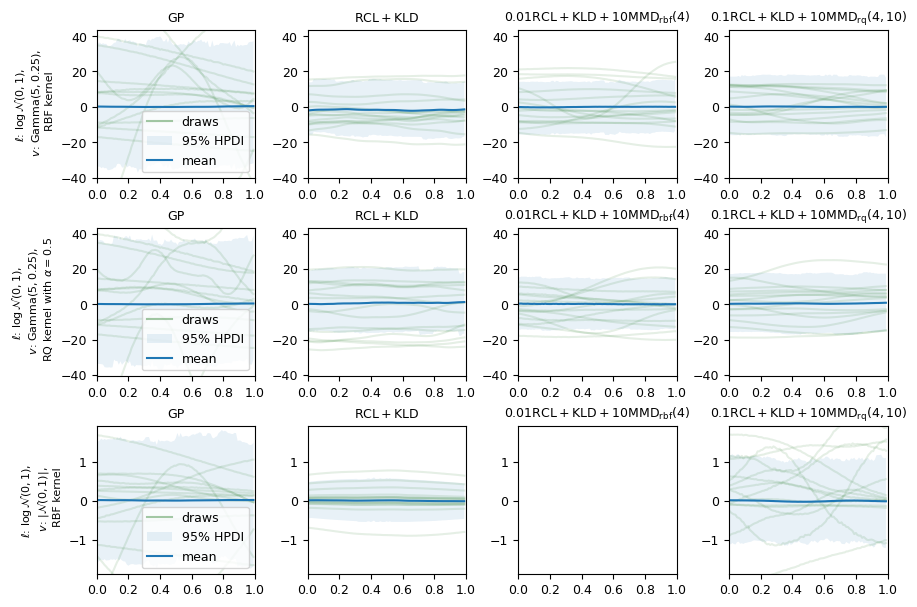

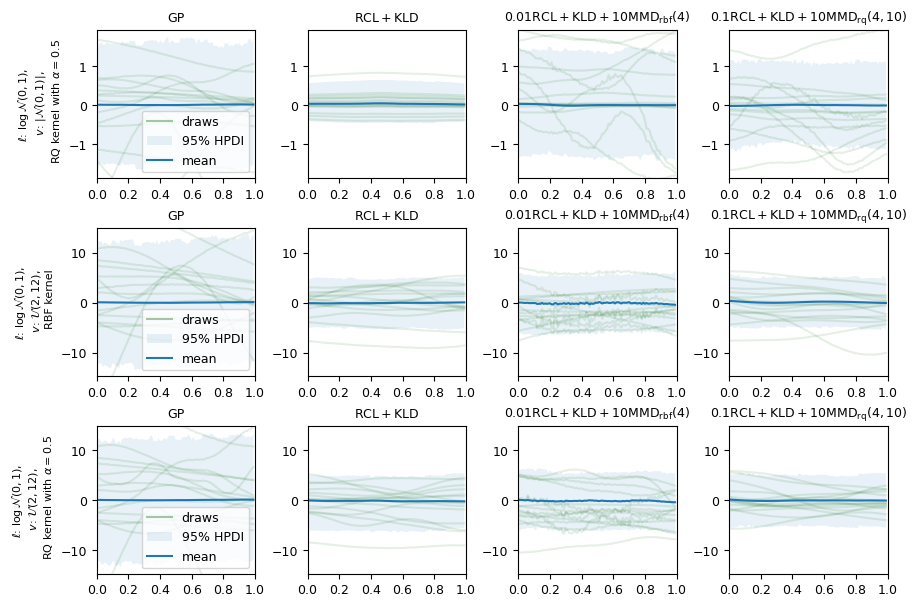

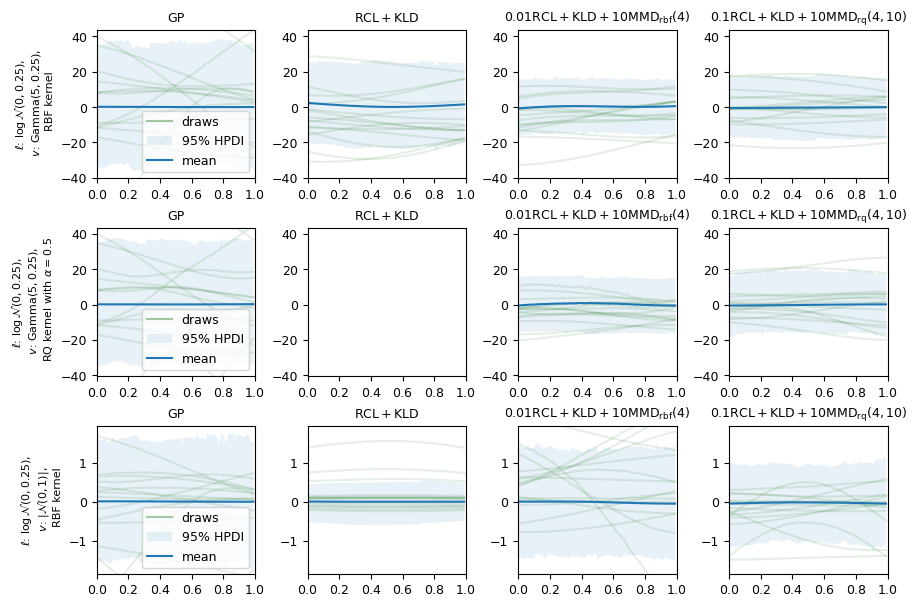

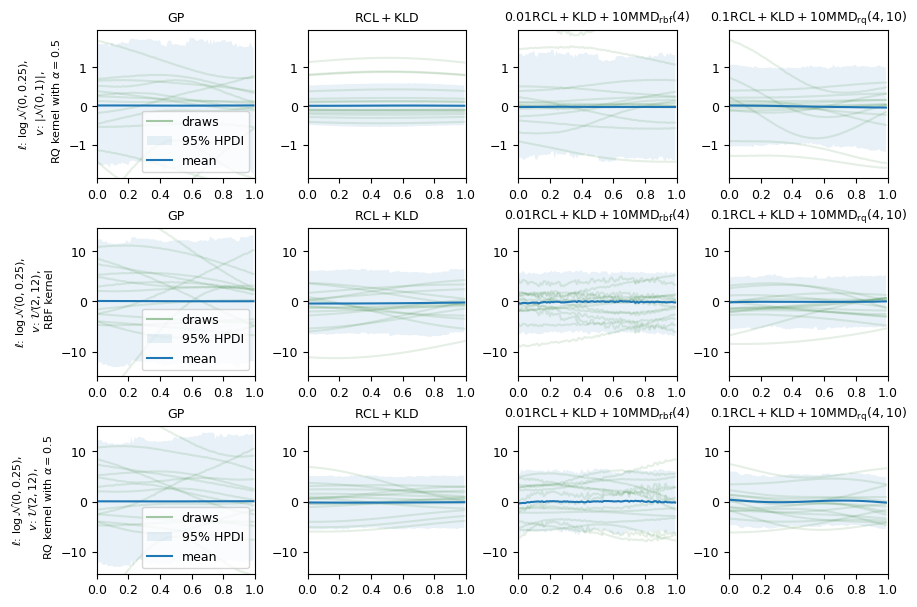

In [51]:
from plotting.paper import plot_trained_draws_compact

plot_trained_draws_compact(
    draws,
    args["x"],
    num_cols,
    num_rows,
    f"{code}/{code}_{name}_{disambig}",
    backfill="align_right",
    plot_range=list(zip(np.repeat(bounds[:, 0], num_cols), np.repeat(bounds[:, 1], num_cols))),
    y_axis_label=titles
)


In [10]:
display_loss_scores(scores, 27, f"{code}_{name}_{disambig}")